In [3]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

In [4]:
data_dir='D:\\Msc GU\\Msc 4th Sem\\Project\\DataSet\\teadataset'

In [5]:
# Set up data augmentation
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2)

# Load in the dataset
train_data = datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training')

val_data = datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation')

Found 711 images belonging to 8 classes.
Found 174 images belonging to 8 classes.


In [6]:
batch_size=32

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense



In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(8, activation='softmax'))



In [9]:
from tensorflow.keras.utils import plot_model

In [10]:
# Generate the structural image view of the model
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)


You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [11]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])







In [12]:
# Print the model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 128)      0

In [13]:
# Train the model
history = model.fit(
    train_data,
    epochs=50,
    batch_size=batch_size,
    validation_data=val_data
)

Epoch 1/50
23/23 [==============================] - 136s 6s/step - loss: 2.0724 - accuracy: 0.1730 - val_loss: 1.8009 - val_accuracy: 0.2414
Epoch 2/50
23/23 [==============================] - 119s 5s/step - loss: 1.4622 - accuracy: 0.3150 - val_loss: 1.3271 - val_accuracy: 0.4195
Epoch 3/50
23/23 [==============================] - 119s 5s/step - loss: 1.2531 - accuracy: 0.4065 - val_loss: 1.2512 - val_accuracy: 0.3908
Epoch 4/50
23/23 [==============================] - 130s 6s/step - loss: 1.2254 - accuracy: 0.4107 - val_loss: 1.2183 - val_accuracy: 0.3793
Epoch 5/50
23/23 [==============================] - 122s 5s/step - loss: 1.2043 - accuracy: 0.4121 - val_loss: 1.3007 - val_accuracy: 0.3563
Epoch 6/50
23/23 [==============================] - 115s 5s/step - loss: 1.1256 - accuracy: 0.4641 - val_loss: 1.1345 - val_accuracy: 0.4483
Epoch 7/50
23/23 [==============================] - 124s 5s/step - loss: 1.0899 - accuracy: 0.4374 - val_loss: 1.0860 - val_accuracy: 0.4138
Epoch 8/50
23

In [14]:
import matplotlib.pyplot as plt

def plot_loss(history):
    # Plot training and validation loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper right')
    plt.show()

def plot_accuracy(history):
    # Plot training and validation accuracy
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='lower right')
    plt.show()



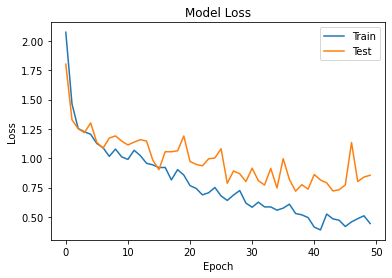

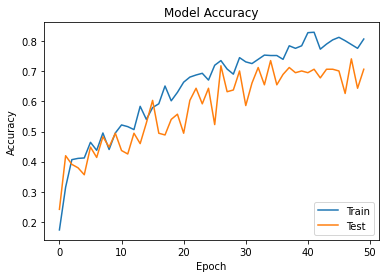

In [15]:
plot_loss(history)
plot_accuracy(history)

In [16]:
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.6)

test_data = datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size= 32,
    shuffle=True,
    class_mode='categorical',
    subset='validation')

Found 528 images belonging to 8 classes.


In [17]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(test_data)

# Print the results
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

17/17 [==============================] - 56s 3s/step - loss: 0.5396 - accuracy: 0.7955
Test Loss: 0.5396195650100708
Test Accuracy: 0.7954545617103577


In [18]:
# Get the true labels for the test data
true_labels = test_data.classes

# Get the predicted labels for the test data
predicted_labels = model.predict(test_data)
predicted_labels = np.argmax(predicted_labels, axis=1)



17/17 [==============================] - 48s 3s/step


In [19]:
# Generate the classification report
print(classification_report(true_labels, predicted_labels))



              precision    recall  f1-score   support

           0       0.12      0.03      0.05        60
           1       0.20      0.18      0.19        67
           2       0.07      0.07      0.07        60
           3       0.16      0.13      0.14        67
           4       0.09      0.15      0.11        60
           5       0.09      0.09      0.09        44
           6       0.24      0.22      0.23        85
           7       0.15      0.19      0.17        85

    accuracy                           0.14       528
   macro avg       0.14      0.13      0.13       528
weighted avg       0.15      0.14      0.14       528



In [20]:
# Generate the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[ 2  7  5  7 12  6  6 15]
 [ 1 12  8  5 12  4 13 12]
 [ 1  9  4  4 15  4 11 12]
 [ 2  6 14  9 13  5  8 10]
 [ 6  5  6  7  9  3  8 16]
 [ 1  4  2 11  9  4  3 10]
 [ 3  7 13  9 12  8 19 14]
 [ 1 11  9  6 21 10 11 16]]


In [21]:
import matplotlib.pyplot as plt


In [26]:
# Get a few images from the test set
num_images = 5
test_images, test_labels = next(test_data)



In [27]:
# Make predictions on the test images
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)



1/1 [==============================] - 0s 471ms/step


In [28]:
# Convert one-hot encoded labels to class names
class_names = list(test_data.class_indices.keys())
true_labels = np.argmax(test_labels, axis=1)
true_class_names = [class_names[label] for label in true_labels]
predicted_class_names = [class_names[label] for label in predicted_labels]



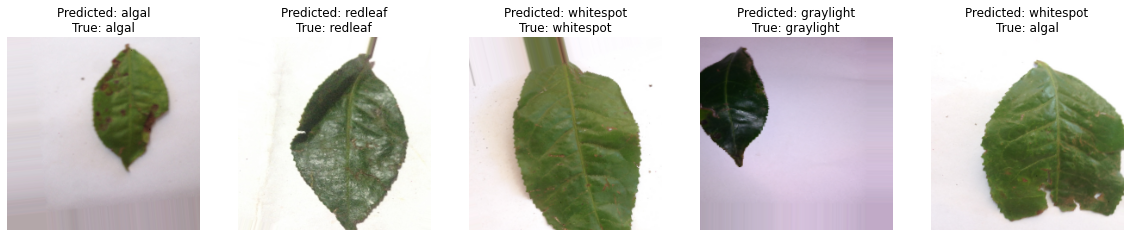

In [29]:
# Plot the images with their predicted and true labels
fig, axes = plt.subplots(1, num_images, figsize=(20, 5))

for i, ax in enumerate(axes):
    ax.imshow(test_images[i])
    ax.axis('off')
    ax.set_title(f"Predicted: {predicted_class_names[i]}\nTrue: {true_class_names[i]}")

plt.show()

In [30]:
model.save("D:\\Msc GU\\Msc 4th Sem\\Thesis\\mycnn.h5")